In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
cars = pd.read_table("auto-mpg.data", delim_whitespace=True, names=columns)
print(cars.head(5))

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [4]:
# "mpg",加仑
# "cylinders", 气缸
# "displacement", 排水量
# "horsepower", 马力
# "weight",重量
# "acceleration",加速度
# "model year",上市年
# "origin", 起源
# "car name"车名






# 单变量查看影响趋势

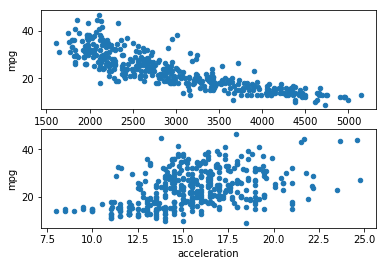

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
cars.plot("weight", "mpg", kind='scatter', ax=ax1)
cars.plot("acceleration", "mpg", kind='scatter', ax=ax2)
plt.show()

# 单变量预测

In [6]:
import sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr.fit(cars[["weight"]], cars["mpg"])
predictions = lr.predict(cars[["weight"]])
print(predictions[0:5])
print(cars["mpg"][0:5])

[ 19.41852276  17.96764345  19.94053224  19.96356207  19.84073631]
0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64


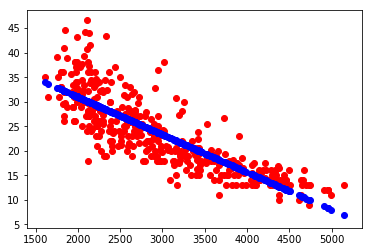

In [7]:
plt.scatter(cars["weight"], cars["mpg"], c='red')
plt.scatter(cars["weight"], predictions, c='blue')
plt.show()

# 线性回归

In [8]:
target = cars["mpg"]
feature = cars.iloc[:,1:8]
feature = feature.drop('horsepower',axis=1)
model = lr.fit(feature,target)
predictions = lr.predict(feature)

pd.DataFrame(zip(feature.columns, np.transpose(model.coef_)))

0         1
0     cylinders -0.384758
1  displacement  0.017053
2        weight -0.006958
3  acceleration  0.152020
4    model year  0.765918
5        origin  1.369059

In [9]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(target, predictions)
print(mse)
rmse = mse ** (0.5)
print (rmse)

10.9344633669
3.30673001119


# 梯度向下回归

In [10]:
from sklearn import linear_model

clf = linear_model.SGDRegressor(penalty='l1',loss="huber")
clf.fit(feature, target)
mse = mean_squared_error(target, predictions)
print(mse)
rmse = mse ** (0.5)
print (rmse)


10.9344633669
3.30673001119


# LASSO回归

In [11]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
# Lasso
from sklearn.linear_model import Lasso

X_train,X_test,y_train,y_test = train_test_split(feature,target,test_size=0.25,random_state=42)

In [12]:
alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
# print(lasso)
print r2_score_lasso

0.840281966506


In [13]:
mse = mean_squared_error(y_pred_lasso, y_test)
print(mse)
rmse = mse ** (0.5)
print (rmse)

9.0693515104
3.01153640363


# ElasticNet 回归

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.840378


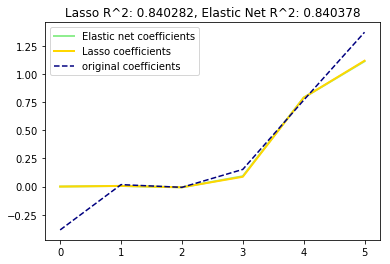

In [14]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)
y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

plt.plot(enet.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')
plt.plot(lasso.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
plt.plot(model.coef_, '--', color='navy', label='original coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f, Elastic Net R^2: %f"
          % (r2_score_lasso, r2_score_enet))
plt.show()

In [15]:
lasso.coef_

array([-0.        ,  0.00546933, -0.00668145,  0.08668385,  0.78843006,
        1.11628024])

In [16]:
enet.coef_

array([-0.        ,  0.00564603, -0.00669747,  0.09189564,  0.78879873,
        1.11140311])

# 岭回归

In [22]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
y_pred_reg = reg.fit(X_train, y_train).predict(X_test)
r2_score_reg = r2_score(y_test, y_pred_reg)

In [23]:
print reg
print("r^2 on test data : %f" % r2_score_reg)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
r^2 on test data : 0.841287


In [24]:
mse = mean_squared_error(y_pred_reg, y_test)
print(mse)
rmse = mse ** (0.5)
print (rmse)

9.01225635298
3.00204203052


# SVR支持向量回归

In [25]:
from sklearn import svm
clf = svm.SVR()
y_pred_svr = reg.fit(X_train, y_train).predict(X_test)
r2_score_svr = r2_score(y_test, y_pred_svr)

In [26]:
print("r^2 on test data : %f" % r2_score_svr)

r^2 on test data : 0.841287


In [27]:
mse = mean_squared_error(y_pred_svr, y_test)
print(mse)
rmse = mse ** (0.5)
print (rmse)

9.01225635298
3.00204203052


# 集成算法回归